## 🧩 결측값(Missing Values)의 개념

데이터 분석에서는 일부 값이 비어 있거나(None, NaN, NA 등) 기록되지 않은 경우가 있습니다.  
이를 **결측값(Missing Value)** 이라고 합니다.  

결측값은 단순히 "빈칸"이 아니라, **분석의 정확도와 신뢰성에 큰 영향을 주는 요소**입니다.  

---

### 💡 결측값 처리의 기본 전략
1. **탐색(Detection)** : 결측이 어디, 얼마나 있는지 확인한다.  
2. **제거(Removal)** : 분석에 방해가 되는 결측값을 삭제한다.  
3. **대체(Imputation)** : 평균값, 중앙값, 모델 예측값 등으로 채운다.  

---

### 🧪 Pandas의 주요 함수
| 함수 | 설명 |
|------|------|
| `pd.isna()` / `pd.isnull()` | 결측값 여부(True/False) 확인 |
| `pd.notna()` / `pd.notnull()` | 결측값이 아닌 값 확인 |
| `.dropna()` | 결측값 제거 |
| `.fillna(value)` | 결측값 대체 |
| `.count()` | 결측값을 제외한 데이터 개수 |

---

### 🧾 예제 데이터

아래 예시는 학생 성적을 나타내는 `score` 시리즈(Series)입니다.  
여기에는 일부 결측값이 포함되어 있습니다.

In [ ]:
# --------------------------------------------
# 📊 Pandas로 결측값이 포함된 데이터 생성 및 기본 탐색
# --------------------------------------------
import pandas as pd

# 1️⃣ 결측값(NaN, NA)이 포함된 데이터 생성

score = pd.Series([30, 20, 40, pd.NA, 30, pd.NA])
print("▶ 원본 데이터:")
print(score)

▶ 원본 데이터:
0      30
1      20
2      40
3    <NA>
4      30
5    <NA>
dtype: object


In [ ]:
# 2️⃣ 결측값을 제외하고 계산
print("\n▶ 결측값 제외 후 합계:", score.sum())  # 결측값 무시하고 합계 계산
print("▶ 결측값 제외 후 평균:", score.mean())   # 결측값 무시하고 평균 계산


▶ 결측값 제외 후 합계: 120
▶ 결측값 제외 후 평균: 30.0


In [ ]:
# 3️⃣ 결측값 확인
print("\n▶ 결측값 여부:")
print(pd.isna(score))                           # True/False로 결측 여부 확인
print("▶ 결측값 개수:", pd.isna(score).sum())  # 결측값의 개수 계산


▶ 결측값 여부:
0    False
1    False
2    False
3     True
4    False
5     True
dtype: bool
▶ 결측값 개수: 2


In [ ]:
# 4️⃣ 전체 데이터 개수와 결측 제외 개수 비교
print("\n▶ 전체 데이터 개수:", score.size)
print("▶ 결측 제외 데이터 개수:", score.count())


▶ 전체 데이터 개수: 6
▶ 결측 제외 데이터 개수: 4


In [ ]:
# 5️⃣ 결측값 제외 후 인덱스 초기화
score = score.dropna().reset_index(drop=True)
print("\n▶ 결측값 제거 및 인덱스 초기화 후 데이터:")
print(score)

score = score.dropna().reset_index(drop = True)


▶ 결측값 제거 및 인덱스 초기화 후 데이터:
0    30
1    20
2    40
3    30
dtype: object


## 🔍 DataFrame에서 결측값 탐색

`Series`가 아닌 **DataFrame** 형태의 데이터에서는 열(column) 또는 행(row) 기준으로 결측값을 탐색할 수 있습니다.

---

### 💡 주요 명령어
- `df.isnull().sum()` : 컬럼별 결측값 개수 확인  
- `df.isnull().sum(axis=1)` : 행별 결측값 개수 확인  
- `df.dropna()` : 결측값이 포함된 행 또는 열 제거  

---

아래 예시는 Iris 데이터 일부를 사용하여 의도적으로 결측값을 삽입한 뒤, 결측을 탐색하고 제거하는 과정을 보여줍니다.

In [ ]:
# --------------------------------------------
# 🧮 DataFrame의 결측값 탐색 및 제거
# --------------------------------------------
import pandas as pd
import numpy as np

# CSV 파일 불러오기 (Colab에서도 실행 가능)
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 1️⃣ 일부 셀에 결측값 삽입 (학습용)
df.iloc[0, 1] = pd.NA
df.iloc[0, 2] = pd.NA
df.iloc[1, 2] = np.nan
df.iloc[2, 3] = None

print("▶ 결측값이 포함된 데이터 (일부):")
print(df.head(5))

▶ 결측값이 포함된 데이터 (일부):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          NaN           NaN          0.2  setosa
1           4.9          3.0           NaN          0.2  setosa
2           4.7          3.2           1.3          NaN  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# 2️⃣ 컬럼별 결측값 개수 확인
print("\n▶ 컬럼별 결측값 개수:\n", df.isnull().sum()) #df.isnull().sum()


▶ 컬럼별 결측값 개수:
 sepal_length    0
sepal_width     1
petal_length    2
petal_width     1
species         0
dtype: int64


In [ ]:
# 3️⃣ 행별 결측값 개수 확인
print("\n▶ 행별 결측값 개수:\n", df.isnull().sum(axis=1)) #df.isnull().sum(axis = 1)


▶ 행별 결측값 개수:
 0      2
1      1
2      1
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64


In [ ]:
# 4️⃣ 결측값이 존재하는 행만 출력
print("\n▶ 결측값이 존재하는 행:")
print(df.loc[df.isnull().sum(axis=1) > 0, :])


▶ 결측값이 존재하는 행:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          NaN           NaN          0.2  setosa
1           4.9          3.0           NaN          0.2  setosa
2           4.7          3.2           1.3          NaN  setosa


In [ ]:
# 5️⃣ 결측값이 포함된 행 제거
df = df.dropna()
df = df.reset_index(drop=True)
print("\n▶ 결측값 제거 후 데이터 크기:", df.shape)
df.head()


▶ 결측값 제거 후 데이터 크기: (147, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,4.6,3.1,1.5,0.2,setosa
1,5.0,3.6,1.4,0.2,setosa
2,5.4,3.9,1.7,0.4,setosa
3,4.6,3.4,1.4,0.3,setosa
4,5.0,3.4,1.5,0.2,setosa


## ⚠️ 결측값 처리 시 주의할 점
1. **무조건 삭제하면 안 된다!**
   - 데이터 손실이 클 수 있으므로, 결측이 많은 컬럼은 분석 목적에 따라 유지할지 결정해야 한다.

2. **대체(Imputation) 방법을 고려하자**
   - 평균값(`mean()`), 중앙값(`median()`), 최빈값(`mode()`), 또는 KNN, 회귀 모델 등을 사용해 대체할 수 있다.

3. **도메인 지식이 중요하다**
   - 단순히 수치적 보정이 아니라, 데이터의 의미(예: 결측이 ‘측정불가’인지 ‘0’인지)를 고려해야 한다.

## 🧩 결측값 대체 (fillna) — 기본 통계 활용

결측값을 무조건 제거하면 데이터 손실이 커질 수 있습니다.  
따라서 **평균(mean)**, **중앙값(median)**, **최빈값(mode)** 등을 활용하여 결측값을 **적절히 대체(Imputation)** 하는 방법을 사용합니다.

---

### 💡 주요 함수
| 함수 | 설명 |
|------|------|
| `fillna(value)` | 특정 값으로 결측을 채움 |
| `fillna(df.mean())` | 컬럼별 평균으로 채움 |
| `fillna(method='ffill')` | 바로 이전 값으로 채움 (Forward fill) |
| `fillna(method='bfill')` | 바로 다음 값으로 채움 (Backward fill) |

---

아래 예시는 Iris 데이터의 `sepal_length` 컬럼의 결측값을 해당 컬럼의 평균값으로 채우는 예시입니다.

In [ ]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 일부 결측값 인위적으로 삽입
df.iloc[0, 0] = np.nan
df.iloc[2, 0] = np.nan
print("▶ 결측값 삽입 후:")
print(df.head(5))

▶ 결측값 삽입 후:
   sepal_length  sepal_width  petal_length  petal_width species
0           NaN          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           NaN          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# 결측값 개수 확인
print("\n▶ 컬럼별 결측값 개수:\n", df.isnull().sum())


▶ 컬럼별 결측값 개수:
 sepal_length    2
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
# 결측값을 평균으로 대체
df['sepal_length'] = df['sepal_length'].fillna(df['sepal_length'].mean())

print("\n▶ 결측값 대체 후 (평균값으로 채움):")
print(df.head(5))

NameError: name 'df' is not defined

## 🤖 KNNImputer를 이용한 결측값 추정

평균이나 중앙값으로 결측을 채우면 간단하지만, 데이터 간의 관계를 충분히 반영하지 못한다는 한계가 있습니다.

이를 보완하기 위해 **K-최근접 이웃(K-Nearest Neighbors, KNN)** 방법을 활용할 수 있습니다.  
KNNImputer는 **결측이 있는 데이터의 주변(이웃)** 을 찾아, 가장 유사한 K개의 데이터를 기준으로 결측값을 추정합니다.

---

### ⚙️ 작동 원리
1. **결측값이 없는 데이터**들 사이의 거리(유사도)를 계산한다.  
2. 결측이 있는 행에 대해 **가장 가까운 K개의 이웃 데이터(K = 5 등)** 를 찾는다.  
3. 그들의 평균(또는 가중 평균)을 이용해 결측값을 채운다.

---

### 💡 sklearn.impute.KNNImputer 주요 옵션
| 초매개변수 | 설명 |
|-----------|------|
| `n_neighbors` | 고려할 이웃의 수 (기본값=5) |
| `weights` | 거리 가중치 방식 (‘uniform’, ‘distance’) |
| `metric` | 거리 계산 방식 (기본값='nan_euclidean') |

---

### 📘 예시 흐름
1️⃣ 결측값이 포함된 데이터 생성  
2️⃣ 데이터 스케일 조정 (MinMaxScaler 사용)  
3️⃣ KNNImputer로 결측값 추정  
4️⃣ 스케일 복원 및 결과 확인

In [ ]:
# --------------------------------------------
# 🤖 기계학습 기반 결측값 추정 (KNNImputer)
# --------------------------------------------
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# 1️⃣ 데이터 불러오기 및 결측값 삽입
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df.iloc[0, 2] = np.nan
df.iloc[1, 3] = np.nan
df.iloc[3, 1] = np.nan
print("▶ 결측값 삽입 후:")
print(df.head(5))

▶ 결측값 삽입 후:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           NaN          0.2  setosa
1           4.9          3.0           1.4          NaN  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          NaN           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# 2️⃣ 스케일 조정 (KNN 거리에 영향을 주지 않도록)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :4])

In [ ]:
# 3️⃣ KNN 기반 결측값 추정
imputer = KNNImputer(n_neighbors=5)
imputed_scaled = imputer.fit_transform(scaled_data)

In [ ]:
# 4️⃣ 스케일 원복 (inverse transform)
imputed = scaler.inverse_transform(imputed_scaled)

In [ ]:
# 5️⃣ 추정 결과를 원래 데이터에 반영
df_filled = df.copy()
df_filled.iloc[:, :4] = imputed

print("\n▶ 결측값이 채워진 결과 (KNN 추정):")
print(df_filled.head(5))


▶ 결측값이 채워진 결과 (KNN 추정):
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1         3.50          1.44         0.20  setosa
1           4.9         3.00          1.40         0.18  setosa
2           4.7         3.20          1.30         0.20  setosa
3           4.6         3.28          1.50         0.20  setosa
4           5.0         3.60          1.40         0.20  setosa


## 🧾 결측값 처리 요약

| 단계 | 주요 함수 | 설명 |
|------|------------|------|
| 탐색 | `isna()`, `notna()` | 결측 여부 확인 |
| 제거 | `dropna()` | 결측 포함 행/열 제거 |
| 단순 대체 | `fillna()` | 평균, 중앙값 등으로 채움 |
| 기계학습 대체 | `KNNImputer()` | 유사 데이터 기반 추정 |

---

✅ **핵심 포인트**
- 단순 삭제보다는 **데이터의 의미를 고려한 대체**가 중요  
- KNNImputer는 데이터 간 유사도를 반영해 **더 현실적인 추정**을 수행  
- 결측값 처리는 전처리의 첫 단추로, **분석의 신뢰성 확보에 필수적인 과정**

## ⚠️ 특잇값(Outlier)의 개념과 중요성

데이터에는 종종 전체적인 분포에서 벗어나는 **극단적인 값(Outlier)** 이 존재합니다.  
이 값들은 실제 오류일 수도 있고, 정상적인 이상 현상일 수도 있습니다.  

---

### 💡 왜 특잇값을 다뤄야 할까?
- 평균이나 표준편차에 큰 영향을 미쳐 **통계적 분석 결과가 왜곡**될 수 있다.  
- 기계학습 모델이 **비정상적인 데이터에 과적합(overfitting)** 될 수 있다.  
- 데이터의 품질을 유지하려면, 특잇값을 탐지하고 적절히 처리해야 한다.

---

### 📘 주요 탐지 방법
| 방법 | 개념 | 특징 |
|------|------|------|
| **Z-점수(Z-score)** | 평균으로부터 얼마나 떨어져 있는지를 표준편차 단위로 측정 | 정규분포 형태의 데이터에 적합 |
| **IQR (사분위 범위)** | 데이터의 25%~75% 범위를 기준으로 이상치 탐지 | 비정규분포 데이터에도 안정적 |

---

이제 Iris 데이터의 **`sepal_width`** 변수를 예로 들어 Z-score와 IQR 두 가지 방법으로 특잇값을 탐지하고 제거해 보겠습니다.

In [ ]:
# --------------------------------------------
# 📊 Z-score를 이용한 특잇값 탐지
# --------------------------------------------
import pandas as pd
import numpy as np
from scipy import stats

# 1️⃣ 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
sw = df['sepal_width']

In [ ]:
# 2️⃣ Z-score 계산 (각 데이터가 평균에서 얼마나 떨어져 있는가)
z = np.abs(stats.zscore(sw))

In [ ]:
# 3️⃣ |Z| > 2인 데이터는 평균에서 2표준편차 이상 벗어난 값 → 특잇값으로 간주
outliers = sw[z > 2]

print("▶ Z-score 기반 특잇값:\n", outliers)
print(f"\n▶ 특잇값 개수: {len(outliers)}")

▶ Z-score 기반 특잇값:
 14    4.0
15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64

▶ 특잇값 개수: 5


In [ ]:
# 4️⃣ 특잇값 제거 후 데이터 크기 비교
clean_z = sw.loc[z <= 2]
print(f"\n▶ 특잇값 제거 후 데이터 크기: {len(clean_z)}")


▶ 특잇값 제거 후 데이터 크기: 145


## 📏 IQR (Interquartile Range) 기반 탐지

**IQR(Interquartile Range, 사분위 범위)** 는 데이터의 **중간 50% 구간(= Q3 - Q1)** 을 이용해  
데이터가 **너무 작거나 너무 큰 값**을 **이상치(Outlier)** 로 판단하는 방법입니다.

---

### 💡 IQR의 개념

데이터를 크기 순으로 정렬했을 때,  
- **Q1 (1사분위수)** : 하위 25% 지점의 값  
- **Q3 (3사분위수)** : 상위 25% 지점의 값  

이때, 중간 50%의 폭을 **IQR**이라 합니다.

$$
\text{IQR} = Q3 - Q1
$$

---

### 📘 IQR을 이용한 이상치 판단 기준

이상치는 일반적으로 다음 범위를 벗어나는 데이터로 정의합니다.

$$
\text{Lower bound} = Q1 - 1.5 \times \text{IQR}
$$

$$
\text{Upper bound} = Q3 + 1.5 \times \text{IQR}
$$

즉, **이 범위를 벗어나는 값은 이상치(Outlier)** 로 간주합니다.

---

### 📊 Z-score vs. IQR 비교

| 구분 | Z-score | IQR |
|------|----------|-----|
| 기준 | 평균과 표준편차 | 사분위수(Q1, Q3) |
| 적합한 분포 | **정규분포 데이터** | **비정규분포나 왜도(skewness, 데이터가 한쪽으로 치우친 정도)** 가 있는 데이터 |
| 장점 | 계산이 간단함 | 이상값에 덜 민감, 안정적 |
| 단점 | 비정규 데이터엔 부적합 | 데이터 크기가 작으면 불안정 |

---

따라서 **Z-score** 는 정규분포형 데이터에,  
**IQR** 은 **비정규분포나 왜도(skewness, 데이터가 한쪽으로 치우친 정도)** 가 있는 데이터에서 더 효과적으로 작동합니다.

In [ ]:
# --------------------------------------------
# 📏 IQR을 이용한 특잇값 탐지 및 제거
# --------------------------------------------
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
sw = df['sepal_width']

# 1️⃣ 사분위수 계산
Q1 = sw.quantile(0.25)
Q3 = sw.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# 2️⃣ 경곗값 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"▶ Q1={Q1:.2f}, Q3={Q3:.2f}, IQR={IQR:.2f}")
print(f"▶ 허용 범위: {lower_bound:.2f} ~ {upper_bound:.2f}")

▶ Q1=2.80, Q3=3.30, IQR=0.50
▶ 허용 범위: 2.05 ~ 4.05


In [ ]:
# 3️⃣ IQR 기준 이상치 탐지
outliers = sw[(sw < lower_bound) | (sw > upper_bound)]
print("\n▶ IQR 기반 특잇값:\n", outliers)


▶ IQR 기반 특잇값:
 15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal_width, dtype: float64


In [ ]:
# 4️⃣ 특잇값 제거
clean_iqr = sw.loc[~sw.isin(outliers)]
print(f"\n▶ 특잇값 제거 후 데이터 크기: {len(clean_iqr)}")


▶ 특잇값 제거 후 데이터 크기: 146


## 📈 특잇값 시각화 (Boxplot)

Boxplot(상자그림)은 IQR 범위를 시각적으로 표현한 그래프입니다.  
중앙의 상자는 **Q1~Q3 범위**, 상자 내 선은 **중앙값(median)**, 상자 밖 점(dot)은 **특잇값(outlier)** 을 나타냅니다.  
Boxplot을 활용하면 데이터의 분포와 이상치를 직관적으로 확인할 수 있습니다.

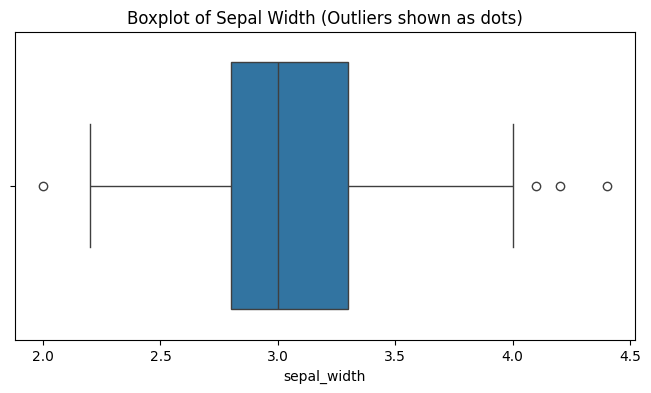

In [ ]:
# --------------------------------------------
# 📈 Boxplot으로 특잇값 시각화
# --------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['sepal_width'])
plt.title("Boxplot of Sepal Width (Outliers shown as dots)")
plt.show()

## 🧾 특잇값 처리 요약

| 방법 | 적용 상황 | 장점 | 단점 |
|------|------------|------|------|
| **Z-score** | 데이터가 정규분포에 가까울 때 | 계산 간단, 빠름 | 비정규분포에서는 부정확 |
| **IQR** | 대부분의 분포형 데이터 | 안정적, 직관적 | 데이터 크기가 작으면 민감 |

---

✅ **핵심 포인트**
- 특잇값은 반드시 제거해야 하는 "오류"가 아닐 수도 있다.  
  → 데이터의 의미를 먼저 해석한 뒤, 제거 여부를 결정해야 한다.  
- 이상치 제거 후에는 평균, 표준편차 등 통계값이 어떻게 달라지는지도 비교해 보자.  
- 시각화를 통해 특잇값이 **전체 분포에 어떤 영향을 주는지** 확인하는 습관을 가지자.

## 📊 데이터 정렬 (Sorting) — sort_values()

데이터 분석의 첫 단계 중 하나는 데이터를 **정렬(Sorting)** 하는 것입니다.  
정렬은 데이터를 **특정 기준(열)** 에 따라 오름차순 또는 내림차순으로 재배열하여 패턴을 파악하고 비교를 쉽게 만듭니다.

---

### 💡 주요 함수
| 함수 | 설명 |
|------|------|
| `sort_values(by='컬럼명')` | 특정 컬럼 기준으로 정렬 |
| `ascending=True/False` | 오름차순(True), 내림차순(False) 지정 |
| `sort_values(['A','B'])` | 여러 기준 컬럼을 순서대로 적용 |

---

### 📘 예시
- **오름차순 정렬**: 낮은 값 → 높은 값  
- **내림차순 정렬**: 높은 값 → 낮은 값  
- **다중 기준 정렬**: 예를 들어, 품종(species)별로 정렬하고 그 안에서 꽃잎 길이 순으로 정렬

이제 Iris 데이터 셋으로 실제 정렬을 실습해 봅시다.

In [ ]:
# --------------------------------------------
# 📊 sort_values() — 데이터 정렬 실습
# --------------------------------------------
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 1️⃣ 오름차순 정렬
df_sorted_asc = df.sort_values('sepal_length')
print("▶ sepal_length 기준 오름차순 정렬:")
print(df_sorted_asc.head(5))

▶ sepal_length 기준 오름차순 정렬:
    sepal_length  sepal_width  petal_length  petal_width species
13           4.3          3.0           1.1          0.1  setosa
8            4.4          2.9           1.4          0.2  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
41           4.5          2.3           1.3          0.3  setosa


In [ ]:
# 2️⃣ 내림차순 정렬
df_sorted_desc = df.sort_values('sepal_length', ascending=False)
print("\n▶ sepal_length 기준 내림차순 정렬:")
print(df_sorted_desc.head(5))


▶ sepal_length 기준 내림차순 정렬:
     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
118           7.7          2.6           6.9          2.3  virginica
117           7.7          3.8           6.7          2.2  virginica
135           7.7          3.0           6.1          2.3  virginica


In [ ]:
# 3️⃣ 여러 기준으로 정렬
df_sorted_multi = df.sort_values(['species', 'sepal_width'])
print("\n▶ species → sepal_width 순으로 정렬:")
print(df_sorted_multi.head(10))


▶ species → sepal_width 순으로 정렬:
    sepal_length  sepal_width  petal_length  petal_width species
41           4.5          2.3           1.3          0.3  setosa
8            4.4          2.9           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
25           5.0          3.0           1.6          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
45           4.8          3.0           1.4          0.3  setosa
3            4.6          3.1           1.5          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa


## 📈 데이터 집계 (Aggregation) — groupby()

**groupby()** 는 데이터를 **특정 기준(그룹)** 으로 묶어서 평균, 합계, 개수 등 요약 통계를 계산할 때 사용합니다.  

예를 들어, **품종(species)** 별 **꽃잎 길이 평균**을 구할 수 있습니다.  
이 과정은 "데이터 요약(Summarization)"의 핵심입니다.

---

### 💡 주요 함수
| 함수 | 설명 |
|------|------|
| `groupby('컬럼')` | 특정 컬럼을 기준으로 그룹화 |
| `.mean()`, `.sum()`, `.count()` | 그룹별 요약 통계 계산 |
| `.agg(['mean','std'])` | 여러 통계량 동시 계산 가능 |

---

### 📘 예시
- 품종별 평균 → `df.groupby('species').mean()`  
- 품종별 표준편차 → `df.groupby('species').std()`  
- 품종별로 여러 지표 계산 → `.agg(['mean','max','min'])`

In [ ]:
# --------------------------------------------
# 📈 groupby() — 데이터 집계 실습
# --------------------------------------------
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

# 1️⃣ 품종별 평균
print("▶ 품종별 평균 (mean):")
print(df.groupby('species').mean().round(2))

▶ 품종별 평균 (mean):
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa              5.01         3.43          1.46         0.25
versicolor          5.94         2.77          4.26         1.33
virginica           6.59         2.97          5.55         2.03


In [ ]:
# 2️⃣ 품종별 표준편차
print("\n▶ 품종별 표준편차 (std):")
print(df.groupby('species').std().round(2))


▶ 품종별 표준편차 (std):
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa              0.35         0.38          0.17         0.11
versicolor          0.52         0.31          0.47         0.20
virginica           0.64         0.32          0.55         0.27


In [ ]:
# 3️⃣ 품종별 평균과 최댓값 동시 계산
print("\n▶ 품종별 평균(mean)과 최대(max) 동시 계산:")
print(df.groupby('species').agg(['mean', 'max']).round(2))


▶ 품종별 평균(mean)과 최대(max) 동시 계산:
           sepal_length      sepal_width      petal_length      petal_width  \
                   mean  max        mean  max         mean  max        mean   
species                                                                       
setosa             5.01  5.8        3.43  4.4         1.46  1.9        0.25   
versicolor         5.94  7.0        2.77  3.4         4.26  5.1        1.33   
virginica          6.59  7.9        2.97  3.8         5.55  6.9        2.03   

                 
            max  
species          
setosa      0.6  
versicolor  1.8  
virginica   2.5  


## 🔗 데이터 병합 (Merging) — merge(), concat()

현실의 데이터는 여러 파일이나 테이블로 나뉘어 있는 경우가 많습니다.  
이를 하나로 합치는 과정을 **데이터 병합(Merging)** 이라고 합니다.  

Pandas는 **두 가지 병합 방식**을 제공합니다:

| 함수 | 설명 |
|------|------|
| `merge()` | SQL의 JOIN과 유사 — 공통 키(key) 기준으로 병합 |
| `concat()` | 행 또는 열 방향으로 단순 연결 |

---

### 💡 merge()의 주요 옵션
| 매개변수 | 설명 |
|-----------|------|
| `on='컬럼명'` | 공통 기준 컬럼 |
| `how='inner'` | 교집합(기본값) |
| `how='left'` | 왼쪽 기준 유지 |
| `how='right'` | 오른쪽 기준 유지 |
| `how='outer'` | 합집합 |

---

아래 예시에서는 학생 성적 데이터를 서로 다른 과목 파일로 나누어 두었다고 가정하고, 이를 **merge()** 로 합쳐봅니다.

In [ ]:
# --------------------------------------------
# 🔗 merge() — 데이터 병합 실습
# --------------------------------------------
import pandas as pd

# 예시 데이터 생성
df_kor = pd.DataFrame({'name': ['a', 'b', 'c'], 'kor': [90, 80, 70]})
df_math = pd.DataFrame({'name': ['a', 'b', 'd'], 'math': [85, 60, 95]})

print("▶ 국어 성적 데이터:\n", df_kor)
print("\n▶ 수학 성적 데이터:\n", df_math)

▶ 국어 성적 데이터:
   name  kor
0    a   90
1    b   80
2    c   70

▶ 수학 성적 데이터:
   name  math
0    a    85
1    b    60
2    d    95


In [ ]:
# 1️⃣ inner join (공통 name만)
inner = df_kor.merge(df_math, on='name', how='inner')
print("\n▶ inner join (공통 학생만):\n", inner)


▶ inner join (공통 학생만):
   name  kor  math
0    a   90    85
1    b   80    60


In [ ]:
# 2️⃣ left join (왼쪽 df_kor 기준)
left = df_kor.merge(df_math, on='name', how='left')
print("\n▶ left join (국어 데이터 기준):\n", left)


▶ left join (국어 데이터 기준):
   name  kor  math
0    a   90  85.0
1    b   80  60.0
2    c   70   NaN


In [ ]:
# 3️⃣ outer join (모든 학생 포함)
outer = df_kor.merge(df_math, on='name', how='outer')
print("\n▶ outer join (모든 학생 포함):\n", outer)


▶ outer join (모든 학생 포함):
   name   kor  math
0    a  90.0  85.0
1    b  80.0  60.0
2    c  70.0   NaN
3    d   NaN  95.0


## 📚 concat() — 행/열 단위 연결

`concat()` 은 공통 키 없이 단순히 **행(row)** 또는 **열(column)** 을 이어 붙이는 함수입니다.

---

### 💡 주요 옵션
| 매개변수 | 설명 |
|-----------|------|
| `axis=0` | 행 방향 결합 (세로로 붙이기) |
| `axis=1` | 열 방향 결합 (가로로 붙이기) |
| `ignore_index=True` | 인덱스 초기화 |

---

아래 예시는 두 개의 데이터프레임을 1️⃣ **행 기준으로 결합**, 2️⃣ **열 기준으로 결합**하는 과정입니다.

In [1]:
# --------------------------------------------
# 📚 concat() — 데이터 결합 실습
# --------------------------------------------
import pandas as pd

# 데이터 생성
df1 = pd.DataFrame({'height': [169, 172, 184], 'weight': [58, 73, 82]})
df2 = pd.DataFrame({'height': [176, 169, 158], 'weight': [71, 62, 60]})
df3 = pd.DataFrame({'grade': [3, 2], 'age': [22, 21]})

In [ ]:
# 1️⃣ 행 방향 결합
df_row = pd.concat([df1, df2], axis=0, ignore_index=True)
print("▶ 행 방향 결합 결과:")
print(df_row)

▶ 행 방향 결합 결과:
   height  weight
0     169      58
1     172      73
2     184      82
3     176      71
4     169      62
5     158      60


In [ ]:
# 2️⃣ 열 방향 결합
df_col = pd.concat([df1, df3], axis=1)
print("\n▶ 열 방향 결합 결과:")
print(df_col)


▶ 열 방향 결합 결과:
   height  weight  grade   age
0     169      58    3.0  22.0
1     172      73    2.0  21.0
2     184      82    NaN   NaN


## 🧾 정리 요약

| 주제 | 주요 함수 | 핵심 기능 |
|------|------------|------------|
| **정렬(Sort)** | `sort_values()` | 데이터를 원하는 기준으로 순서 재배열 |
| **집계(Group)** | `groupby()` | 그룹별 평균, 합계, 표준편차 계산 |
| **병합(Merge)** | `merge()` | 공통 키 기준으로 SQL JOIN처럼 결합 |
| **결합(Concat)** | `concat()` | 행/열 단위 단순 연결 |

---

✅ **핵심 포인트**
- 정렬은 데이터 탐색의 출발점이다.  
- 집계는 데이터를 요약하고 인사이트를 도출한다.  
- 병합과 결합은 흩어진 데이터를 하나의 구조로 통합한다.

## 📈 피벗 테이블(Pivot Table)

**피벗 테이블**은 데이터를 **행(row)** 과 **열(column)** 기준으로 요약하여 패턴을 한눈에 볼 수 있게 해주는 강력한 데이터 요약 도구입니다.  

엑셀(Excel)의 피벗 테이블과 거의 동일한 기능을 Pandas에서도 사용할 수 있습니다.  
즉, **복잡한 데이터를 요약하고, 그룹별 평균·합계·비율 등을 계산**할 수 있습니다.

---

### 💡 주요 함수
| 함수 | 설명 |
|------|------|
| `pivot_table()` | 데이터를 요약해 행·열별로 집계 |
| `index` | 행 기준 컬럼 |
| `columns` | 열 기준 컬럼 |
| `values` | 요약할 데이터 컬럼 |
| `aggfunc` | 집계 함수 (예: `mean`, `sum`, `max`, `count` 등) |

---

### 📘 예시 시나리오
예를 들어, 음식점의 계산 데이터(`tips`)에서  
- 성별(sex)별로  
- 요일(day)별  
- 평균(total_bill)을 계산하면  

각 요일마다 남성과 여성의 평균 지출 금액을 한눈에 비교할 수 있습니다.

In [ ]:
# --------------------------------------------
# 📈 pivot_table() — 기본 피벗 테이블 생성
# --------------------------------------------
import seaborn as sns
import pandas as pd

# 1️⃣ 예시 데이터 불러오기
df = sns.load_dataset('tips')
print("▶ 원본 데이터:")
print(df.head(5))

▶ 원본 데이터:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [ ]:
# 2️⃣ 성별(sex) × 요일(day)별 평균 계산
p1 = df.pivot_table(
    index='sex',          # 행 기준
    columns='day',        # 열 기준
    values='total_bill',  # 요약할 대상
    aggfunc='mean',       # 평균 계산
    observed=False        # FutureWarning 방지용
)

print("\n▶ 성별·요일별 평균 청구금액:")
print(p1.round(2))


▶ 성별·요일별 평균 청구금액:
day      Thur    Fri    Sat    Sun
sex                               
Male    18.71  19.86  20.80  21.89
Female  16.72  14.15  19.68  19.87


## ⚙️ 피벗 테이블 확장 — 다중 기준 및 다양한 요약 함수

하나의 기준뿐 아니라 **여러 기준(index, columns)** 을 동시에 설정할 수 있습니다.  
또한 **하나 이상의 집계함수(aggfunc)** 를 지정하여 다양한 통계치를 동시에 확인할 수도 있습니다.  

예를 들어,  
- 시간대(time)별  
- 요일(day)별  
- 팁(`tip`)의 **평균(mean)** 과 **최댓(max)** 값을 동시에 계산할 수 있습니다.

In [ ]:
# --------------------------------------------
# ⚙️ 다중 기준 및 다중 통계 피벗테이블
# --------------------------------------------
import pandas as pd
import seaborn as sns

df = sns.load_dataset('tips')

# 1️⃣ 시간(time) × 요일(day)별 팁의 평균과 최댓값 계산
p2 = df.pivot_table(
    index='time',
    columns='day',
    values='tip',
    aggfunc=['mean', 'max'],  # 여러 통계치 동시 계산
    observed=False            # FutureWarning 방지용
)

print("▶ 시간대·요일별 팁 통계 (평균, 최댓값):")
print(p2.round(2))

▶ 시간대·요일별 팁 통계 (평균, 최댓값):
        mean                    max                 
day     Thur   Fri   Sat   Sun Thur   Fri   Sat  Sun
time                                                
Lunch   2.77  2.38   NaN   NaN  6.7  3.48   NaN  NaN
Dinner  3.00  2.94  2.99  3.26  3.0  4.73  10.0  6.5


## 🔍 피벗 테이블 vs. groupby 비교

| 구분 | pivot_table | groupby |
|------|--------------|---------|
| 출력 형태 | 2차원 표 형태 | 계층적 인덱스 Series/DataFrame |
| 목적 | 요약 통계 시각화 | 세부 통계 처리 |
| 장점 | 엑셀과 유사, 한눈에 비교 가능 | 더 세밀한 연산 가능 |
| 사용 예 | 성별·요일별 평균 매출 | 품종별 평균·표준편차 계산 |

---

💡 **요약**
- `groupby()`는 **데이터 처리 중심**,  
- `pivot_table()`은 **데이터 해석·시각화 중심**입니다.

둘을 함께 활용하면,  
**데이터 분석의 “정리(전처리)” → “요약(집계)” → “통찰(시각화)”** 흐름을 완성할 수 있습니다.

In [ ]:
# --------------------------------------------
# 🎨 피벗 테이블 → 시각화 예시
# --------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = sns.load_dataset('tips')

# 1️⃣ 피벗 테이블 생성: 요일별·성별 평균 청구금액
pivot_table = df.pivot_table(
    index='day',
    columns='sex',
    values='total_bill',
    aggfunc='mean',
    observed=False            # FutureWarning 방지용
)

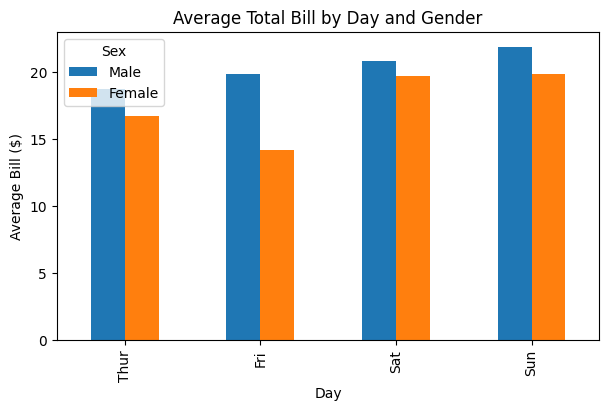

In [ ]:
# 2️⃣ 시각화 (막대그래프)
pivot_table.plot(kind='bar', figsize=(7,4))
plt.title("Average Total Bill by Day and Gender")
plt.ylabel("Average Bill ($)")
plt.xlabel("Day")
plt.legend(title="Sex")
plt.show()

## 🧾 피벗 테이블 요약

| 항목 | 설명 |
|------|------|
| **기능** | 행·열 기준으로 데이터를 요약 및 비교 |
| **핵심 매개변수** | `index`, `columns`, `values`, `aggfunc` |
| **주요 활용** | 평균, 합계, 최대·최소 등 요약 통계 |
| **응용** | 엑셀 대체, 요약표 생성, 시각화 전처리 |

---

✅ **핵심 포인트**
- `pivot_table()`은 데이터를 2차원 형태로 정리해 **패턴을 시각적으로 이해**할 수 있게 해준다.  
- `groupby()`보다 **분석 결과를 요약·시각화하기에 용이**하다.  
- 엑셀의 피벗 테이블 기능을 **Python 코드 한 줄로 재현**할 수 있다.